# An NCBI Guide to Finding and Analyzing Metagenomic Data

This Jupyter Notebook contains the instructions for the two hands-on exercises of this workshop:

* [Objective 1 - Searching for SRA Data & Metadata on the NCBI Website](#Objective-1) 
* [Objective 2 - Aligning SRA sequence reads to NCBI databases using MagicBLAST](#Objective-2) 

**To access the slides for today's workshop, please download them using this link: https://ftp.ncbi.nlm.nih.gov/pub/education/Mod_Workshops/2021/Metagenomics_Oct/**

# Objective 0 - What is a Jupyter Notebook

Jupyter Notebooks are a web-based approach to interactive code. A single notebook (the file you are currently reading) is composed of many "cells" which can contain either text, or code. To navigate between cells, either click, or use the arrow keys on your keyboard.

A text cell will look like... well... this! While a code cell will look something like what you see below. To run the code inside a code cell, click on it, then click the "Run" button at the top of the screen. Try it on the code cell below!

In [1]:
#This is a code cell
print('You ran the code cell!')

You ran the code cell!


If it worked, you should have seen text pop up underneath the cell saying `You ran the code cell!`. Note the `In [1]:` that appeared next to the cell. This tells you the order you have run code cells throughout the notebook. The next time you run a code cell, it will say `In [2]:`, then `In [3]:` and so on... This will help you know if/when code has been run.

The remainder of the notebook below has been pre-built by the workshop organizer. You will not need to create any new cells, and you will be explicitly told if/when to execute a code cell.

The code in this workshop is either Bash (i.e., terminal commands) or Python. Bash commands are prefixed with `!` while Python commands are not. If you are not familiar with code, don't feel pressured to interpret it very deeply. Descriptions of each code block will be provided!

Enjoy!

# Objective 1 - Searching for SRA Data & Metadata on the NCBI Website <a class="anchor" id="Objective-1"></a>

## Objective Goals

1. Search the NCBI website for SRA sequence data and BioSample metadata
2. Use STAT to gain preliminary insights into sequence read taxonomy distribution

### Step 1

Navigate to https://www.ncbi.nlm.nih.gov/

### Step 2

Use the search bar at the top of the screen to search for the paper's BioProject accession `PRJEB37709`

The BioProject page provides some background about the project including:

    - Description (in this case, it appears to be the abstract from the paper)
    - Submission info (*e.g.*, accession number and submitter information)
    - Associated BioProject data (*e.g.* SRA experiments and BioSamples)
    
### Step 3

Click on the `15` next to the BioSample category in the **Project Data** section. This will show us a list of all BioSamples stored in the BioProject

We are looking for two samples from this list:

    - Patient_B_unaffected_eye
    - Patient_B_affected_eye

So find those two accessions and open their pages in new tabs. We will do the following steps for each sample, but let's start with `Patient_B_unaffected_eye`.

### Step 4

The BioSample page contains all of the metadata associated with where/how the sequence reads were obtained

To get the SRA run accession (where the actual sequence data is stored), click on the `SRA` button in the **Related Information** tab on the right-hand side of the screen.

### Step 5

This new SRA page displays the SRA experiment. This is the metadata associated with how the sequence data was generated (*e.g.* sequencing machine, sequencing type, etc.). At the bottom of the page there is a `Runs` section which shows the sequence run accession. Click on that link.

### Step 6

This page is the SRA Run Browser where we can explore details and statistics about the reads themselves (*e.g.* number of bases, GC content, quality scores, and links back to the parent categories like BioSample and BioProject). This is also where we can see the results from the **STAT** analysis done on the reads.

To see the STAT results, click the `Analysis` tab near the top of the page

### Step 7

The main Analysis page gives a broad overview of the top hits for this accession. We can get a deeper view by clicking the `View in Krona` button, so let's do that.

### Step 8

This Krona pie-chart is organized so that higher taxonomic groups are in the center of the chart. As you move out towards the edge of the pie-chart, the taxonomic classification will become more specific. You can also click on non-species clades to zoom in on that region of the pie-chart.

For example, try finding and clicking on `Proteobacteria` to see the focused list of species present.

### Step 9

Use the center of the piechart to navigate back to higher-order clades. If you want the original pie-chart, click on the accession number in the middle of the pie-chart.

### Step 10

Use the navigation skills you've learned for Krona to find the top 5 most abundant bacterial species in this sample. Use the Jupyter Notebook cell below this to write your list so you can refer back to it later!

Here are a few hints to help you with your search in these pie-charts:

1. Identifying a species segment in the pie-chart can be done in two ways:
    - The name is two parts (*e.g. Escherichia coli*)
    - Krona will not let you expand that clade like it will with higher-order segments
2. The percentages next to each name are adjusted based on which clade you are zoomed into. Be sure you aren't too zoomed in that you miss some bacterial species.
3. However, because we are only interested in Bacteria today, you can at least zoom the pie-chart in on the Bacteria level to make it easier to see the species.

### `Patient_B_unaffected_eye` Species Go here:
(Double click here to start typing)

1. 
2. 
3.
4.
5.


### Step 11 - Do it again!

Repeat the steps above for the other sample `Patient_B_affected_eye` to get it's own list of 5 most abundant species!

### `Patient_B_affected_eye` Species Go Here:
(Double click here to start typing)

1. 
2. 
3. 
4. 
5. 


***
## END OF OBJECTIVE 1
***


# Objective 2 - Aligning SRA sequence reads to NCBI databases using MagicBLAST <a class="anchor" id="Objective-2"></a>

## Objective Goals

1. Run MagicBLAST to align SRA reads against an NCBI database
2. Compare species distribution from MagicBLAST to preliminary list gathered from STAT

### NOTE

In an effort to save time and computational resources, MagicBLAST and the necessary database for today have been pre-installed into this notebook for you. If you want details on how to install MagicBLAST and download NCBI databases please see the official MagicBLAST documentation here: https://ncbi.github.io/magicblast/

**The following code block is required for this notebook to run properly. It will allow BLAST to see the database files properly. Please make sure this has run!**

In [2]:
%env BLASTDB=/srv/data/

env: BLASTDB=/srv/data/


### Step 1 - Run MagicBLAST

First off, we need to run MagicBLAST on each of the accessions so we have some data to use. 

Remember, from Objective 1 we learned that we want data for two accessions:

`Patient_B_unaffected_eye` = `ERR4836973`

`Patient_B_affected_eye`   = `ERR4836970`

The following code block is pre-written with the correct MagicBLAST command for `Patient_B_affected_eye`. We'll do the full analysis for that accession together. Afterwards I will let you try it yourself with the other sample.

**Use the following code block for Patient_B_affected_eye**

**Estimated Time to Run - 10 minutes**

In [3]:
!~/magicblast -db 16S_ribosomal_RNA/16S_ribosomal_RNA -outfmt tabular -out B_affected.tsv \
-num_threads 2 -splice F -limit_lookup F -sra ERR4836970 && echo "MagicBLAST complete!"

MagicBLAST complete!


There are several parameters we are adding with MagicBLAST to make it run the way we want. Here is the list of parameters and what they each do:

`-db 16S_ribosomal_RNA/16S_ribosomal_RNA` : This is the location of the database of known sequences that we will be comparing our SRA reads to.

`-outfmt tabular` : The standard output format for MagicBLAST results is called "BAM" format. To make it easier to read results, we will use this parameter to change the output to a simple tab-delimited table.

`-out B_affected.tsv` : This parameter tells MagicBLAST to put our results into a file named "B_affected.tsv"

`-num_threads 2` : To make the program run faster, everyone will use two threads (similar to using two CPUs) to run the code. This will *almost* run the code 2x faster than if we did not add this parameter.

`-splice F` : This parameter disables MagicBLAST from searching for spliced alignments, which is not useful here.

`limit_lookup F` : MagicBLAST naturally eliminates sections of sequences from the reference database which overlap (because the same string in multiple sequences is not informative). In our case, a database made entirely of a well-conserved gene will remove too much of the reference sequences giving bad results. So we turn this feature off with this parameter.

`-sra ERR4836970` : MagicBLAST can retrieve SRA reads for us, instead of making us download them ourselves. This parameter tells MagicBLAST which SRA accession we want to analyze

`&& echo "MagicBLAST complete!"` : MagicBLAST won't tell us when it is finished, so I have added an extra command-line command called "echo" which adds whatever we tell it to the cell output. So here, I am asking the cell to say "MagicBLAST complete" after magicBLAST is done running, just so it's obvious. 

### Step 2 - Filter the Results

Now that we have some data generated, let's try to dissect some information from it using some basic command-line tools. First of all, let's look at our table of results using `head`:

In [4]:
!head B_affected.tsv

# MAGICBLAST 1.6.0
# /home/jupyter-fake_user2/magicblast -db 16S_ribosomal_RNA/16S_ribosomal_RNA -outfmt tabular -out B_affected.tsv -num_threads 2 -splice F -limit_lookup F -sra ERR4836970 
# Fields: query acc.	reference acc.	% identity	not used	not used	not used	query start	query end	reference start	reference end	not used	not used	score	query strand	reference strand	query length	BTOP	num placements	not used	compartment	left overhang	right overhang	mate reference	mate ref. start	composite score
ERR4836970.1.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	422	-	0	-	-	-	-	-	-	0
ERR4836970.2.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	426	-	0	-	-	-	-	-	-	0
ERR4836970.3.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	425	-	0	-	-	-	-	-	-	0
ERR4836970.4.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	404	-	0	-	-	-	-	-	-	0
ERR4836970.5.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	1590	-	0	-	-	-	-	-	-	0
ERR4836970.6.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	438	-	0	-	-	-	-	-	-	0
ERR4836970.7.1	-	0	0	0	0	0	0	0	0	0	99	0	-	-	430	-	0	-	-	-	-	-	-	0


This table is a bit messy, and much of this data we don't want to look at today. So let's use the tool `cut` to choose which columns in our table we want to look at...

In [5]:
!cut -f 1,2,3 B_affected.tsv > B_affected_trimmed_table.tsv
!head B_affected_trimmed_table.tsv

# MAGICBLAST 1.6.0
# /home/jupyter-fake_user2/magicblast -db 16S_ribosomal_RNA/16S_ribosomal_RNA -outfmt tabular -out B_affected.tsv -num_threads 2 -splice F -limit_lookup F -sra ERR4836970 
# Fields: query acc.	reference acc.	% identity
ERR4836970.1.1	-	0
ERR4836970.2.1	-	0
ERR4836970.3.1	-	0
ERR4836970.4.1	-	0
ERR4836970.5.1	-	0
ERR4836970.6.1	-	0
ERR4836970.7.1	-	0


Now that the table is easier to read, here's what we are looking at:

- Column 1 - The Query accession (the specific sequencing read)

- Column 2 - The Reference accession (the sequence the read is similar to)

- Column 3 - The Percent Identify (one measure of how similar the two seqs are)

This is great, but we see that many of the rows are basically empty (*i.e.*, the read didn't align to anything well). So let's use `grep` to filter out the rows where there was no good alignment...

In [6]:
!grep 'NR' B_affected_trimmed_table.tsv > B_affected_hits.tsv
!head B_affected_hits.tsv

ERR4836970.9.1	NR_156999.1	90.7173
ERR4836970.10.1	NR_104943.1	93.8889
ERR4836970.10.1	NR_041978.1	93.8889
ERR4836970.10.1	NR_114111.1	93.8889
ERR4836970.14.1	NR_044508.1	89.9038
ERR4836970.17.1	NR_133977.1	92.4444
ERR4836970.21.1	NR_027552.1	93.9616
ERR4836970.26.1	NR_117869.1	96.7568
ERR4836970.33.1	NR_112629.1	94.0678
ERR4836970.33.1	NR_113265.1	94.0678


### Step 3 - Turn Accessions Into Species

There is a second BLAST tool, called `blastdbcmd` which can be used to extract information from BLAST databases. We can use it here to transform the reference accessions we have from the table above into a list of species names. This way we can see exactly which species our reads are aligning well with. So let's do it!

In [7]:
!cut -f2 B_affected_hits.tsv > B_affected_accs.txt
!~/blastdbcmd -entry_batch B_affected_accs.txt -db 16S_ribosomal_RNA/16S_ribosomal_RNA -outfmt "%L" -out B_affected_species.txt
!head B_affected_species.txt

Rodentibacter trehalosifermentans
[Curtobacterium] plantarum
Pantoea agglomerans
Pantoea agglomerans
Herminiimonas glaciei
Rossellomorea oryzaecorticis
Bacillus subtilis
Sphingomonas endophytica
Bacillus subtilis
Bacillus subtilis


### Step 4 - Measure Species Abundance

Now that we have a list of species, we can add up the number of times each species is present, to see how many reads are associated with each species. We will use a few different terminal commands below to sort (`sort`), count (`uniq`), and display (`head`) this data in a table.

In [8]:
!sort B_affected_species.txt | uniq -c | sort -nr > B_affected_counts.txt
!head B_affected_counts.txt

   9335 Bacillus subtilis
   3225 Staphylococcus capitis
   1512 Rossellomorea oryzaecorticis
   1267 Bacillus tequilensis
   1016 Bacillus paralicheniformis
    964 Bacillus mojavensis
    815 Rossellomorea vietnamensis
    812 Bacillus velezensis
    713 Bacillus piscis
    586 Bacillus spizizenii


Finally, we'll use just a little bit of Python to convert those numeric values into percentages. Don't worry about the details here if you aren't familiar with Python, we are just calculating percentages and rewriting the new values to a new file.

In [13]:
aligned_reads = 0
lines = []

with open('B_affected_counts.txt', 'r') as infile:
    for line in infile:
        line = line.strip().split()
        aligned_reads += int(line[0])
        lines.append(line)
        
with open('B_affected_percents.txt', 'w') as outfile:
    outfile.write('Reads\tPercent\tSpecies\n')
    for line in lines:
        percent = round(((int(line[0]) / aligned_reads)*100), 2)
        species = ' '.join(line[1:])
        outfile.write('{0}\t{1}%\t{2}\n'.format(line[0], percent, species))

!head B_affected_percents.txt

Reads	Percent	Species
9335	21.23%	Bacillus subtilis
3225	7.33%	Staphylococcus capitis
1512	3.44%	Rossellomorea oryzaecorticis
1267	2.88%	Bacillus tequilensis
1016	2.31%	Bacillus paralicheniformis
964	2.19%	Bacillus mojavensis
815	1.85%	Rossellomorea vietnamensis
812	1.85%	Bacillus velezensis
713	1.62%	Bacillus piscis


### Step 5 - Try it Yourself!

Now that you have done the full analysis with the `Patient_B_unaffected_eye` sample, try doing it again with the `Patient_B_unaffected_eye` sample. Like before, the following code block is pre-written with the same MagicBLAST command for the second sample.

**Use the following code block for Patient_B_unaffected_eye**

**Estimated Time to Run - 2 minutes**

In [10]:
!~/magicblast -db 16S_ribosomal_RNA/16S_ribosomal_RNA -outfmt tabular -out B_unaffected.tsv \
-num_threads 2 -splice F -limit_lookup F -sra ERR4836973 && echo "MagicBLAST Complete!"

MagicBLAST Complete!


The next code block is a condensed version of Steps 2-4 from above. After running this code block you should be able to immediately compare the output table to the list of species you made from STAT.

In [15]:
# Grab necessary columns and rows from results table
!cut -f 1,2,3 B_unaffected.tsv | grep 'NR' | cut -f2 > B_unaffected_accs.txt

# Grab taxonomic names
!~/blastdbcmd -entry_batch B_unaffected_accs.txt -db 16S_ribosomal_RNA/16S_ribosomal_RNA -outfmt "%L" -out B_unaffected_species.txt

# Sort and count all unique species in the taxonomy list
!sort B_unaffected_species.txt | uniq -c | sort -nr > B_unaffected_counts.txt

# Convert numbers to percentages
aligned_reads = 0
lines = []
with open('B_unaffected_counts.txt', 'r') as infile:
    for line in infile:
        line = line.strip().split()
        aligned_reads += int(line[0])
        lines.append(line)
with open('B_unaffected_percents.txt', 'w') as outfile:
    outfile.write('Reads\tPercent\tSpecies\n')
    for line in lines:
        percent = round(((int(line[0]) / aligned_reads)*100), 2)
        species = ' '.join(line[1:])
        outfile.write('{0}\t{1}%\t{2}\n'.format(line[0], percent, species))

!head B_unaffected_percents.txt

Reads	Percent	Species
51	11.43%	Simonsiella muelleri ATCC 29453
41	9.19%	Eikenella longinqua
29	6.5%	Eikenella halliae
27	6.05%	Microvirgula curvata
14	3.14%	Escherichia fergusonii ATCC 35469
12	2.69%	Staphylococcus capitis
12	2.69%	Shigella flexneri
10	2.24%	Shigella sonnei
10	2.24%	Shigella dysenteriae


### Step 6 - Compare the Samples

We can graphically compare the MagicBLAST results from each sample using a little bit of Python code to convert the percentages in the table into pie-charts. We won't spend a lot of time detailing how the Python code works, but if you are familiar you can explore it yourself!

**The name on the outside of the pie-chart is the species name**

**The number on the inside is the number of reads associated with that individual in the sample**

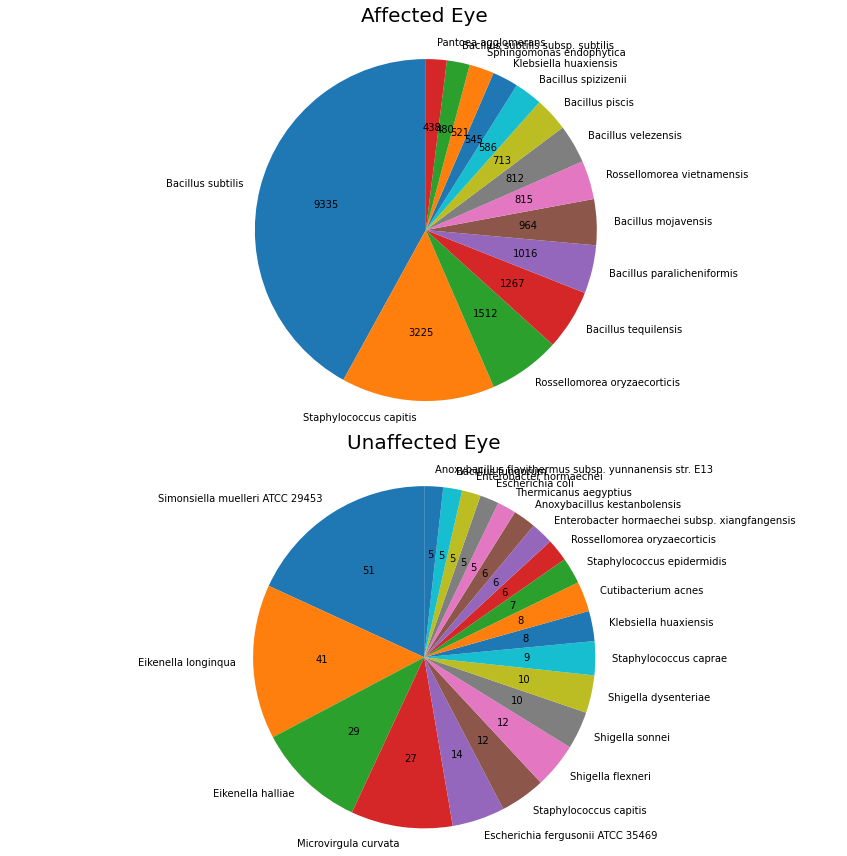

In [25]:
import matplotlib.pyplot as plt

def parse_percents(filename):
    # Parse percents file into two lists for piechart
    labels = []
    vals = []
    with open(filename, 'r') as infile:
        next(infile)
        for line in infile:
            line = line.strip().split('\t')
            #val = float(line[0][:-1])
            val = float(line[0])
            percent = float(line[1][:-1])
            if percent >= 1: # Only take anything 1% abundant or higher... too many isolates otherwise
                vals.append(val)
                labels.append(line[2])
    return labels, vals

# Set chart parameters
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12,12))


# Make affected piechart
affected_labels, affected_vals = parse_percents('B_affected_percents.txt')
ax1.pie(affected_vals, labels=affected_labels, autopct=lambda p: '{:.0f}'.format(p * sum(affected_vals) / 100), startangle=90)
ax1.set_title('Affected Eye', pad=20, size=20)
ax1.axis('equal')

# Make unaffected piechart
unaffected_labels, unaffected_vals = parse_percents('B_unaffected_percents.txt')
ax2.pie(unaffected_vals, labels=unaffected_labels, autopct=lambda p: '{:.0f}'.format(p * sum(unaffected_vals) / 100), startangle=90)
ax2.set_title('Unaffected Eye', pad=20, size=20)
ax2.axis('equal')

# Show piecharts
plt.tight_layout()
plt.show()### Step 6 - Compare to STAT

### Step 7 - Compare to STAT

With our new tables of species and their abundance for each sample, let's compare the species we found using MagicBLAST to the ones we found with STAT.

Use the Piecharts above to explore your MagicBLAST results.

To get the STAT results, scroll up to Objective 1 in this notebook and see the species you typed out.

Do you notice any differences in the list of abundant species? What about in their relative abundance (*i.e.* are some species more/less abundant in each set of results?) 

Use the Notebook cell below to write down your thoughts!

### What did you discover?

Double-click here to start writing out your thoughts!